# Ejercicio 2 - Modelos de Clasificación Binaria

<hr width="50%" align="left"/>
<br/>

## **Grupo 09**

## Integrantes:

<p>
<img align="left" src="https://github.com/mmaddalena.png" height=50 width=50 />

### [Martin Andres Maddalena](https://github.com/mmaddalena) (107610)
<br/>
</p>

<p>
<img align="left" src="https://github.com/Petroshka00.png" height=50 width=50 />

### [Tomas Petrocini](https://github.com/Petroshka00) (110157)
<br/>
</p>

<p>
<img align="left" src="https://github.com/mateozorzi.png" height=50 width=50 />

### [Mateo Zorzi](https://github.com/mateozorzi) (109634)
<br/>
</p>

<p>
<img align="left" src="https://github.com/AlanRichmond" height=50 width=50 />

### [Alan Richmond](https://github.com/AlanRichmond) (106783)
<br/>
</p>

<p>
<img align="left" src="https://github.com/gbigolin.png" height=50 width=50 />

### [Gianella Bigolin](https://github.com/gbigolin) (108659)
<br/>
</p>

<hr width="50%" align="left"/>
<br/>

# Imports Generales

In [1]:
# Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

# Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Para trabajar con formato parquet
import pyarrow.parquet as pq

# Para chequear que los datasets ya estan importados
import os

!pip install gdown --quiet
import gdown

from joblib import dump
from joblib import load

# Importar dataset

si se quiere descargar el archivo csv desde el repositorio

In [ ]:
# usamos la copia del dataset que se encuentra subido en el repositorio del grupo
if not os.path.exists("weatherAUS.csv"):
    !wget -O weatherAUS.csv https://raw.githubusercontent.com/mmaddalena/TA047R-2C2025-GRUPO09/refs/heads/main/TP1/datasets/ej2/weatherAUS.csv

dataset = pd.read_csv("weatherAUS.csv")

dataset de locations

In [ ]:
# usamos la copia del dataset que se encuentra subido en el repositorio del grupo
if not os.path.exists("aus_coordinates.csv"):
    !wget -O aus_coordinates.csv https://raw.githubusercontent.com/mmaddalena/TA047R-2C2025-GRUPO09/refs/heads/main/TP1/datasets/ej2/aus_coordinates.csv

locaciones = pd.read_csv("aus_coordinates.csv")

# Descarga de dataset

Descargar el dataset ya relacionado desde google drive, no hace falta hacer el filtrado de `Location`

In [2]:
url = 'https://drive.google.com/file/d/1qjzp3KN70HIN1U8mTBA23yMk9AkQIN4k/view?usp=sharing'
output_path = 'dataset_australia.parquet'
gdown.download(url, output_path, quiet=False,fuzzy=True)

dataset = pq.read_table("dataset_australia.parquet")
dataset = dataset.to_pandas()

Downloading...
From: https://drive.google.com/uc?id=1qjzp3KN70HIN1U8mTBA23yMk9AkQIN4k
To: /content/dataset_australia.parquet
100%|██████████| 1.79M/1.79M [00:00<00:00, 28.5MB/s]


# Filtrado de `Location` (si se importaron los dataset)

Primero se debe filtrar los datos por las zonas correspondientes a estudiar.

Para esto se debe relacionar el dataset del clima con el de las coordenadas de Australia, de esta manera sabemos que location son las que nos interesan

In [ ]:
zonas = ["Victoria", "Territorio del Norte", "Australia Meridional", "Australia Occidental", "Tasmania"]

dataset = dataset.merge(
    locaciones[['Region', 'Location']],
    on='Location',
    how='left'
)

dataset = dataset[dataset["Region"].isin(zonas)]

In [ ]:
locaciones_distintas = dataset['Region'].unique()
print(locaciones_distintas)

['Victoria' 'Australia Meridional' 'Australia Occidental' 'Tasmania'
 'Territorio del Norte']


Cantidad total de registros

In [ ]:
cantidad_registros = dataset.shape[0]
print("Cantidad de registros: ", cantidad_registros)

Cantidad de registros:  78014


Guardar dataset filtrado

In [ ]:
dataset.to_parquet("dataset_australia.parquet")

# Exploracion de datos

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78014 entries, 27167 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           78014 non-null  object 
 1   Location       78014 non-null  object 
 2   MinTemp        77202 non-null  float64
 3   MaxTemp        77258 non-null  float64
 4   Rainfall       76299 non-null  float64
 5   Evaporation    48704 non-null  float64
 6   Sunshine       46339 non-null  float64
 7   WindGustDir    76722 non-null  object 
 8   WindGustSpeed  76779 non-null  float64
 9   WindDir9am     73387 non-null  object 
 10  WindDir3pm     77210 non-null  object 
 11  WindSpeed9am   77661 non-null  float64
 12  WindSpeed3pm   77662 non-null  float64
 13  Humidity9am    76595 non-null  float64
 14  Humidity3pm    75896 non-null  float64
 15  Pressure9am    72983 non-null  float64
 16  Pressure3pm    72970 non-null  float64
 17  Cloud9am       48670 non-null  float64
 18  Cloud3

### Variables Cuantitativas

Con el metodo describe tenemos una analisis de distintos parametros de cada una de las variables del dataset, que mas tarde pueden servir para el procesamiento de los datos.

In [4]:
# removemos primero las columnas con valores categóricos pero aparentemente numéricos
dataset_cuantitativas = dataset.drop(["Date", "Location", 'WindGustDir', "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "Region"], axis=1, inplace=False)
# cambiamos de notación científica a notación decimal y cambiamos la cantidad de cifras
pd.set_option('display.float_format', lambda x: '%.1f' % x)
# hacemos un resumen con las variables que quedan
dataset_cuantitativas.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,77202.0,77258.0,76299.0,48704.0,46339.0,76779.0,77661.0,77662.0,76595.0,75896.0,72983.0,72970.0,48670.0,46415.0,77180.0,76542.0
mean,11.2,23.0,1.9,5.4,7.6,40.9,14.6,18.8,68.2,48.8,1017.4,1015.2,4.5,4.6,16.2,21.4
std,6.1,7.6,6.3,4.3,3.8,13.5,8.8,8.3,20.7,21.2,7.5,7.4,2.9,2.7,6.5,7.4
min,-5.6,4.6,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,982.0,977.1,0.0,0.0,-2.3,1.7
25%,6.9,17.0,0.0,2.4,4.7,31.0,9.0,13.0,55.0,33.0,1012.5,1010.1,1.0,2.0,11.5,15.6
50%,10.6,21.7,0.0,4.4,8.3,39.0,13.0,19.0,70.0,49.0,1017.4,1015.2,5.0,5.0,15.3,20.2
75%,14.9,28.5,0.6,7.4,10.8,48.0,20.0,24.0,84.0,63.0,1022.6,1020.3,7.0,7.0,20.1,26.5
max,33.9,48.1,367.6,82.4,14.5,135.0,67.0,76.0,100.0,100.0,1041.0,1039.6,8.0,9.0,40.2,46.1


## Variables Categoricas

Podemos estudiar la frecuencia de aparicion de las variables categoricas y como se distribuyen en el dataset

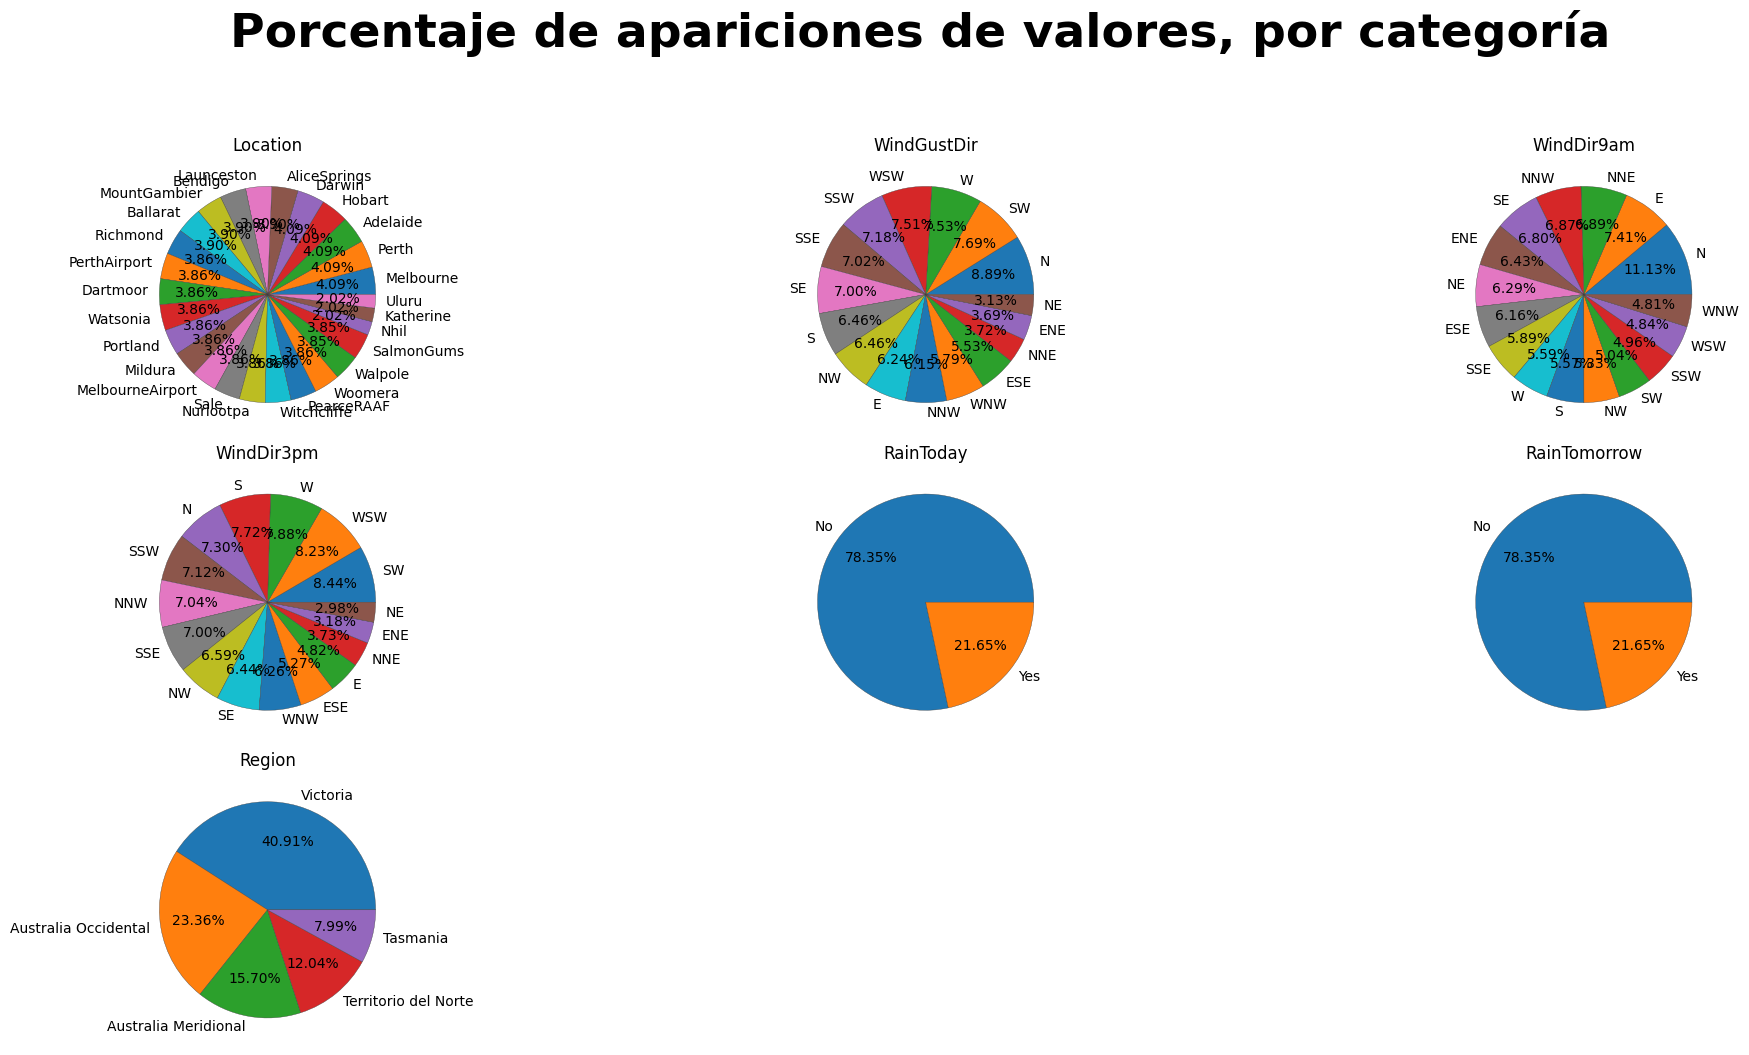

In [5]:
variables_categoricas = ["Location", 'WindGustDir', "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "Region"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
fig.suptitle("Porcentaje de apariciones de valores, por categoría", y=1.05, fontsize=34, weight="bold")

for i, categoria in enumerate(variables_categoricas):
    cuenta = dataset[categoria].value_counts().to_frame()

    ax = axes[i//3, i%3]
    cuenta.plot.pie(
        title=categoria,
        y="count",
        ax=ax,
        autopct="%1.2f%%",
        pctdistance=0.65,
        wedgeprops={"edgecolor": "#3c3c3c", "linewidth": 0.25},
        legend=False,
        ylabel=''
    )

for j in range(len(variables_categoricas), 9):
    fig.delaxes(axes[j//3, j%3])

plt.tight_layout()
plt.show()

## Correlaciones

Analisis gráfico de como estan correlacionadas cada variable numerica del dataset.

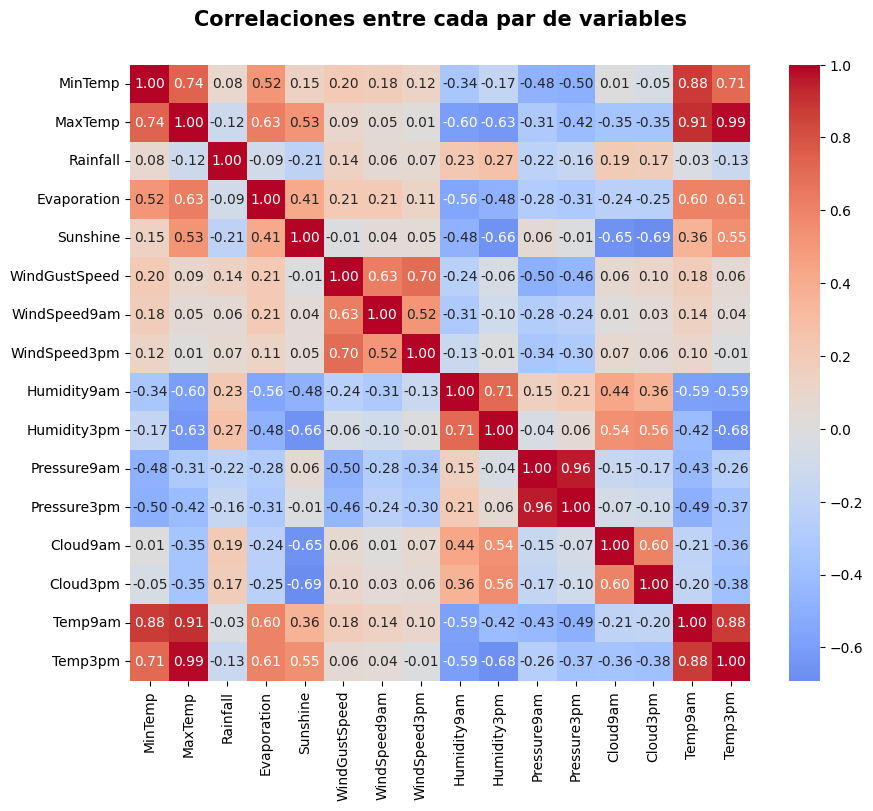

In [6]:
# Calculamos la matriz de correlaciones
correlaciones = dataset.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlaciones,
    annot=correlaciones.round(2),
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar=True
)

plt.title(
    "Correlaciones entre cada par de variables",
    y=1.05,
    fontdict={"size": 15, "weight": "bold"}
)
plt.show()


Correlaciones importantes:

**Neagtivas:**
*   `sunshine` y `Cloud9am` o `Cloud3pm`
*   `sunshine` y `Humidity3pm`
*   `Humidity9am` y `Temp9am`
*   `Humidity3pm` y `Temp3pm` o `MaxTemp`
*   `Evaporation` y `Humidity9am` o `Humidity3pm`
*   `WindGustSpeed` y `Pressure9am` o `Pressure3pm`
*   `WindSpeed9am` y `Pressure9am`
*   `WindSpeed3am` y `Pressure3pm`

**Positivas**
*    `Temp9am` y `MinTemp`
*    `Temp3pm` y `MaxTemp`
*   `Temp9am` y `Temp3pm`
*    `Rainfall` y `Humidity9am` o `Humidity3pm`
*    `Evaporation` y `Temp9am` o `Temp3pm`
*    `WindGustSpeed` y `WindSpeed9am` o `WindSpeed3am`
*    `Pressure9am` y `Pressure3pm`
*    `sunshine`y `Cloud9am` o `Cloud3pm`



# Procesamiento de datos

Para poder analizar de buena forma el modelo, primero debemos encargarnos de procesar la informacion para que esta en un estado no inválido. Por esto se realiza un procesamiento de los datos, como por ejemplo, datos faltantes o outliers, para que luego el modelo funcione de la mejor manera

## Datos Faltantes

In [7]:
print(dataset.isna().sum())

Date                 0
Location             0
MinTemp            812
MaxTemp            756
Rainfall          1715
Evaporation      29310
Sunshine         31675
WindGustDir       1292
WindGustSpeed     1235
WindDir9am        4627
WindDir3pm         804
WindSpeed9am       353
WindSpeed3pm       352
Humidity9am       1419
Humidity3pm       2118
Pressure9am       5031
Pressure3pm       5044
Cloud9am         29344
Cloud3pm         31599
Temp9am            834
Temp3pm           1472
RainToday         1715
RainTomorrow      1722
Region               0
dtype: int64


In [8]:
filas_totales = dataset.shape[0]
print(dataset.isna().sum() / filas_totales * 100)

Date             0.0
Location         0.0
MinTemp          1.0
MaxTemp          1.0
Rainfall         2.2
Evaporation     37.6
Sunshine        40.6
WindGustDir      1.7
WindGustSpeed    1.6
WindDir9am       5.9
WindDir3pm       1.0
WindSpeed9am     0.5
WindSpeed3pm     0.5
Humidity9am      1.8
Humidity3pm      2.7
Pressure9am      6.4
Pressure3pm      6.5
Cloud9am        37.6
Cloud3pm        40.5
Temp9am          1.1
Temp3pm          1.9
RainToday        2.2
RainTomorrow     2.2
Region           0.0
dtype: float64


Se debe de decidir que hacer con los datos faltantes en las columnas.

## Eliminar por gran cantidad de valores faltantes

En algunas variables como `Evaporation`, `sunshine`, `Cloud9am` y `Cloud3pm` cerca del 40% de los registros tiene datos faltantes. Esto puede hacer que el predecir o rellenar con algun valor cambie drasticamente los analisis posteriores. Al haber una gran cantidad de valores nulos, una opcion es descartar todos estos registros.


In [9]:
cant_reg_original = dataset.shape[0]
dataset_drop = dataset.dropna(subset=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])
restantes = dataset_drop.shape[0]
print("Cant registros: ", cant_reg_original)
print("Canti restantes: ", restantes)
print("Se dropea el ", 100 - (restantes / cant_reg_original * 100), "% de los registros")

Cant registros:  78014
Canti restantes:  34828
Se dropea el  55.35673084318199 % de los registros


Observamos como cambio la cantidad de datos faltantes en las columnas

In [10]:
print(dataset_drop.isna().sum())

Date                0
Location            0
MinTemp            28
MaxTemp            14
Rainfall           29
Evaporation         0
Sunshine            0
WindGustDir       364
WindGustSpeed     352
WindDir9am       1028
WindDir3pm        140
WindSpeed9am       30
WindSpeed3pm       24
Humidity9am       100
Humidity3pm        62
Pressure9am        45
Pressure3pm        35
Cloud9am            0
Cloud3pm            0
Temp9am            62
Temp3pm            17
RainToday          29
RainTomorrow      145
Region              0
dtype: int64


## Relleno variables categoricas


Para las variables categoricas de direccion del viento, creamos una nueva clase que sea SinMedicion




In [11]:
#ya se comprobo que Location y Region no tienen datos nulos
variables_dir_viento = ['WindGustDir', "WindDir9am", "WindDir3pm"]

categoria_nula = "SinMedicion"
dataset_drop[variables_dir_viento] = dataset_drop[variables_dir_viento].fillna(categoria_nula)


/tmp/ipython-input-4121299650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_drop[variables_dir_viento] = dataset_drop[variables_dir_viento].fillna(categoria_nula)


## Rellenado Multivariado

### Rellenado `RainTomorrow`

Como es la variable target, no no sirve rellenarla, dropeamos los registros vacios



In [12]:
cant_reg_original = dataset_drop.shape[0]
dataset_drop = dataset_drop.dropna(subset=['RainTomorrow'])
restantes = dataset_drop.shape[0]
print("Cant registros: ", cant_reg_original)
print("Canti restantes: ", restantes)
print("Se dropea el ", 100 - (restantes / cant_reg_original * 100), "% de los registros")

Cant registros:  34828
Canti restantes:  34683
Se dropea el  0.41633168714827207 % de los registros


### Rellanado variables numericas

A las variables numericas con valores faltantes, haremos un rellenado con el valor promedio de las columnas dependiendo de la locacion del dato faltante. De esta manera, asegurandonos que los valores por locacion sean parecidos.

In [13]:
# Lista de columnas numéricas a imputar por Location
variables_numericas = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'
]

# Rellenar con promedio por Location
for col in variables_numericas:
    dataset_drop[col] = dataset_drop.groupby('Location')[col].transform(
        lambda x: x.fillna(x.mean())
    )

### Rellenado de `Rain Today`

Para esta variable se utiliza el valor de `rainfall`, si este es mayor 1 significa que llovió.

In [14]:
dataset_drop['RainToday'] = dataset_drop['Rainfall'].apply(lambda x: 'Yes' if x > 1 else 'No')

Comprobamos nuevamnete el estado de los varlores faltantes luego de completar los datos faltantes.

In [15]:
print(dataset_drop.isna().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Region           0
dtype: int64


## Outliers

Analizamos las variables numericas con z-score

In [16]:
from scipy import stats

num_predictivas = [
  "MinTemp",
  "MaxTemp",
  "Rainfall",
  "Evaporation",
  "Sunshine",
  "WindSpeed9am",
  "WindSpeed3pm",
  "Humidity9am",
  "Humidity3pm",
  "Pressure9am",
  "Pressure3pm",
  "Cloud9am",
  "Cloud3pm",
  "Temp9am",
  "Temp3pm"
]

z_scores = np.abs(stats.zscore(dataset_drop[num_predictivas]))
outliers_z = (z_scores > 3).any(axis=1)

print(f"Outliers detectados: {outliers_z.sum()} de {len(dataset_drop)} ({100 * outliers_z.mean():.2f}%)")
print(dataset_drop[outliers_z][num_predictivas].head())
print(f"Dataset actualizado (sin outliers Z-score): {len(dataset_drop)} filas restantes.")

dataset_drop = dataset_drop.loc[~outliers_z].copy() # Limpio

Outliers detectados: 1744 de 34683 (5.03%)
       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindSpeed9am  \
61220     18.6     24.5       0.8         18.0       0.1           9.0   
61224     12.4     19.1      21.0          2.0       4.5           7.0   
61244     13.5     21.6       3.6          5.2       9.5          37.0   
61286      6.6     16.9       0.0          4.4       7.2          63.0   
61297      7.5     15.5      10.2          2.2       8.2          52.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
61220          22.0         75.0         64.0       1010.7       1012.2   
61224          17.0         88.0         71.0       1022.4       1023.7   
61244          46.0         40.0         32.0       1010.0       1008.3   
61286          37.0         65.0         53.0       1002.3       1008.5   
61297          65.0         46.0         44.0        993.9        993.3   

       Cloud9am  Cloud3pm  Temp9am  Temp3pm  
61220       8.0

# Creacion de set de entrenamiento y test

Se crearan dataset para entrenamiento y testing. Para entrenar modelos que predigan si llovera al siguiente dia.


In [17]:
from sklearn.model_selection import train_test_split

# variable target
y = dataset_drop["RainTomorrow"].map({"Yes": 1, "No": 0})

# variables predictoras
X = dataset_drop.drop("RainTomorrow", axis=1)

# Split en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño train:", X_train.shape[0])
print("Tamaño test:", X_test.shape[0])


Tamaño train: 26351
Tamaño test: 6588






*  Codificación de categóricas





In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)


In [19]:
from sklearn.impute import SimpleImputer

# Imputadores
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")



*   Preprocesador con ColumnTransformer



In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Columnas
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
            'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
            'Cloud3pm', 'Temp9am', 'Temp3pm']

cat_cols = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
            'RainToday', 'Region']

# Pipelines por tipo
num_pipeline = Pipeline(steps=[("imputer", num_imputer)])
cat_pipeline = Pipeline(steps=[
    ("imputer", cat_imputer),
    ("encoder", encoder)
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols)
    ]
)

# Modelo 1: Árbol de decisión

## Entrenar o descargar modelo

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Ruta y URL del modelo
MODEL_PATH = "dt_pipeline.joblib"
MODEL_URL = "https://drive.google.com/file/d/1IK7SFOAV4QoLMVhtqnHiIiVCFQVZhEIP/view?usp=sharing"

# Verificar si el modelo existe localmente, si no, intentar descargarlo
if not os.path.exists(MODEL_PATH):
  gdown.download(MODEL_URL, MODEL_PATH, quiet=False, fuzzy=True)

# Si todavía no existe, entrenar uno nuevo
if not os.path.exists(MODEL_PATH) or os.path.getsize(MODEL_PATH) == 0:
  print("Entrenando modelo\n")
  # Pipeline completo
  dt_pipeline = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("classifier", DecisionTreeClassifier(random_state=42))
  ])

  # Entrenar
  dt_pipeline.fit(X_train, y_train)

  dump(dt_pipeline, "dt_pipeline.joblib")
else:
  print("Cargando modelo ya entrenado\n")
  dt_pipeline = load("dt_pipeline.joblib")

Downloading...
From: https://drive.google.com/uc?id=1IK7SFOAV4QoLMVhtqnHiIiVCFQVZhEIP
To: /content/dt_pipeline.joblib
100%|██████████| 436k/436k [00:00<00:00, 50.6MB/s]

Cargando modelo ya entrenado



## Evaluacion Modelo

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predicciones
y_pred = dt_pipeline.predict(X_test)

# Evaluación
print("--- Evaluación del Modelo de Árbol de Decisión ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
#print("\nMatriz de Confusión:")
#print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Rain Tomorrow', 'Rain Tomorrow']))
print("---------------------------------------------------")

--- Evaluación del Modelo de Árbol de Decisión ---
Accuracy: 0.8444

Reporte de Clasificación:
                  precision    recall  f1-score   support

No Rain Tomorrow       0.89      0.92      0.90      5270
   Rain Tomorrow       0.62      0.56      0.59      1318

        accuracy                           0.84      6588
       macro avg       0.76      0.74      0.75      6588
    weighted avg       0.84      0.84      0.84      6588

---------------------------------------------------


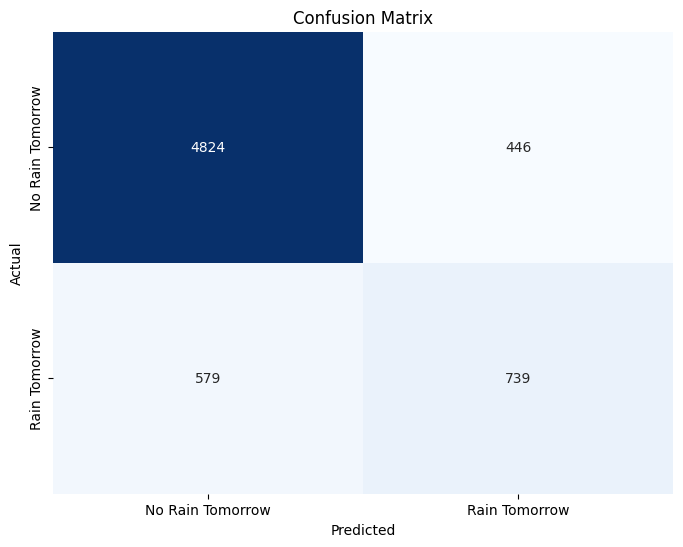

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain Tomorrow', 'Rain Tomorrow'],
            yticklabels=['No Rain Tomorrow', 'Rain Tomorrow'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Optimización con GridSearchCV

### Optimizar Modelo

In [24]:
from sklearn.model_selection import GridSearchCV

# Ruta y URL del modelo
MODEL_PATH = "dt_opt_pipeline.joblib"
MODEL_URL = "https://drive.google.com/file/d/1sLTn_WrQX2LWaXtkqmpZ7Z0L-wHSQrIg/view?usp=sharing"

# Verificar si el modelo existe localmente, si no, intentar descargarlo
if not os.path.exists(MODEL_PATH):
  gdown.download(MODEL_URL, MODEL_PATH, quiet=False, fuzzy=True)

# Si todavía no existe, entrenar uno nuevo
if not os.path.exists(MODEL_PATH) or os.path.getsize(MODEL_PATH) == 0:
  print("Entrenando modelo\n")
  # Grid de hiperparámetros
  param_grid = {
      "classifier__max_depth": [3, 5, 10, None],
      "classifier__min_samples_split": [2, 10, 20],
      "classifier__min_samples_leaf": [1, 5, 10],
      "classifier__criterion": ["gini", "entropy"]
  }

  # GridSearch con 5-fold CV
  grid_search = GridSearchCV(
      dt_pipeline, param_grid,
      cv=5, scoring="accuracy", n_jobs=-1
  )

  grid_search.fit(X_train, y_train)

  dump(grid_search, "dt_opt_pipeline.joblib")
else:
  print("Cargando modelo ya entrenado\n")
  grid_search = load("dt_opt_pipeline.joblib")


Downloading...
From: https://drive.google.com/uc?id=1sLTn_WrQX2LWaXtkqmpZ7Z0L-wHSQrIg
To: /content/dt_opt_pipeline.joblib
100%|██████████| 502k/502k [00:00<00:00, 92.6MB/s]

Cargando modelo ya entrenado



### Evaluar Modelo optimizado

Mejores parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 2}
Mejor score (CV): 0.8558689935298114
Accuracy en test: 0.852762598664238


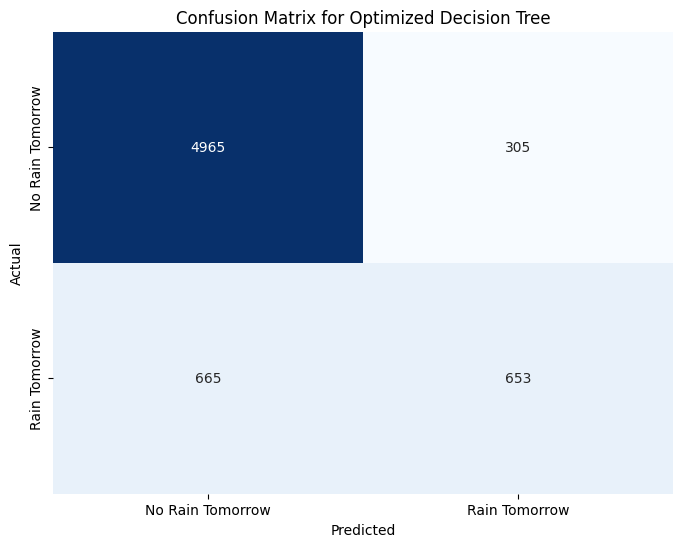


Reporte de Clasificación:
                  precision    recall  f1-score   support

No Rain Tomorrow       0.88      0.94      0.91      5270
   Rain Tomorrow       0.68      0.50      0.57      1318

        accuracy                           0.85      6588
       macro avg       0.78      0.72      0.74      6588
    weighted avg       0.84      0.85      0.84      6588



In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate on test with the best model
best_dt = grid_search.best_estimator_

# Predict using the best estimator from GridSearchCV
y_pred_best = best_dt.predict(X_test)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (CV):", grid_search.best_score_)

# Evaluar en test con el mejor modelo
best_dt = grid_search.best_estimator_

print("Accuracy en test:", accuracy_score(y_test, y_pred_best))

# Calculate the confusion matrix for the best model
cm_best = confusion_matrix(y_test, y_pred_best)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain Tomorrow', 'Rain Tomorrow'],
            yticklabels=['No Rain Tomorrow', 'Rain Tomorrow'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Optimized Decision Tree')
plt.show()

# Print the classification report
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_best, target_names=['No Rain Tomorrow', 'Rain Tomorrow']))

In [ ]:
# Reporte arbol de desicion con optimizacion
report_dt = classification_report(y_test, y_pred_best, target_names=['No Rain Tomorrow', 'Rain Tomorrow'], output_dict=True)
accuracy_dt_best = report_dt['accuracy']
precision_dt_rain = report_dt['Rain Tomorrow']['precision']
recall_dt_rain = report_dt['Rain Tomorrow']['recall']
f1_dt_rain = report_dt['Rain Tomorrow']['f1-score']
precision_dt_no_rain = report_dt['No Rain Tomorrow']['precision']
recall_dt_no_rain = report_dt['No Rain Tomorrow']['recall']
f1_dt_no_rain = report_dt['No Rain Tomorrow']['f1-score']

# Modelo 2: Random Forest

En primer lugar se calcula el modelo sin nigun tipo de optimizacion

## Entrenar modelo

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta y URL del modelo
MODEL_PATH = "rf_pipeline.joblib"
MODEL_URL = "https://drive.google.com/file/d/1pPjin-_zv7Pf-00y5Q13xL7pBBQGfw_f/view?usp=sharing"


# Verificar si el modelo existe localmente, si no, intentar descargarlo
if not os.path.exists(MODEL_PATH):
  gdown.download(MODEL_URL, MODEL_PATH, quiet=False, fuzzy=True)

# Si todavía no existe, entrenar uno nuevo
if not os.path.exists(MODEL_PATH) or os.path.getsize(MODEL_PATH) == 0:
  print("Entrenando modelo\n")
  # Pipeline completo
  rf_pipeline = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("classifier", RandomForestClassifier(random_state=42))
  ])

  rf_pipeline.fit(X_train, y_train)

  dump(rf_pipeline, "rf_pipeline.joblib")
else:
  print("Cargando modelo ya entrenado\n")
  rf_pipeline = load("rf_pipeline.joblib")

Downloading...
From: https://drive.google.com/uc?id=1pPjin-_zv7Pf-00y5Q13xL7pBBQGfw_f
To: /content/rf_pipeline.joblib
100%|██████████| 83.2M/83.2M [00:00<00:00, 164MB/s]


Cargando modelo ya entrenado



## Evaluar Modelo

--- Evaluación del Modelo Random Forest ---
Accuracy: 0.8657

Reporte de Clasificación:
                  precision    recall  f1-score   support

No Rain Tomorrow       0.88      0.97      0.92      5270
   Rain Tomorrow       0.79      0.45      0.57      1318

        accuracy                           0.87      6588
       macro avg       0.83      0.71      0.75      6588
    weighted avg       0.86      0.87      0.85      6588

---------------------------------------------------


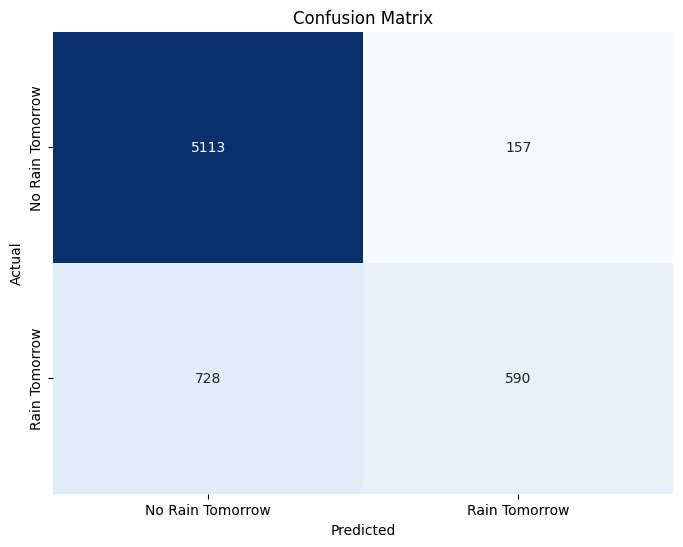

In [27]:
# Predicciones
y_pred = rf_pipeline.predict(X_test)

# Evaluación
print("--- Evaluación del Modelo Random Forest ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Rain Tomorrow', 'Rain Tomorrow']))
print("---------------------------------------------------")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain Tomorrow', 'Rain Tomorrow'],
            yticklabels=['No Rain Tomorrow', 'Rain Tomorrow'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Optimizacion Modelo

En la segunda iteracion del modelo, se entrenó utilizando los mejores hiperparámetros encontrados previamente con `GridSearchCV`.  
El flujo es el siguiente:




### Entrenar modelo optimizado

In [28]:
from sklearn.model_selection import GridSearchCV

# Ruta y URL del modelo
MODEL_PATH = "rf_opt_pipeline.joblib"
MODEL_URL = "https://drive.google.com/file/d/1V9rb-EinX8FV27KYSF8R_0AcuS8fL3Hd/view?usp=sharing"

# Verificar si el modelo existe localmente, si no, intentar descargarlo
if not os.path.exists(MODEL_PATH):
  gdown.download(MODEL_URL, MODEL_PATH, quiet= False,fuzzy=True)

# Si todavía no existe, entrenar uno nuevo
if not os.path.exists(MODEL_PATH) or os.path.getsize(MODEL_PATH) == 0:
  print("Entrenando modelo\n")
  # Pipeline completo con Random Forest
  rf_pipeline_opt = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("classifier", RandomForestClassifier(random_state=42))
  ])
  param_grid_rf = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [10, None],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2],
  }


  # GridSearch con 5-fold CV
  grid_search_rf = GridSearchCV(
      rf_pipeline_opt, param_grid_rf,
      cv=5, scoring="accuracy", n_jobs=-1
  )

  grid_search_rf.fit(X_train, y_train)

  dump(grid_search_rf, "rf_opt_pipeline.joblib")
else:
  print("Cargando modelo ya entrenado\n")
  grid_search_rf = load("rf_opt_pipeline.joblib")

Downloading...
From (original): https://drive.google.com/uc?id=1V9rb-EinX8FV27KYSF8R_0AcuS8fL3Hd
From (redirected): https://drive.google.com/uc?id=1V9rb-EinX8FV27KYSF8R_0AcuS8fL3Hd&confirm=t&uuid=a96805e4-4135-40dc-92a6-a318a63082e5
To: /content/rf_opt_pipeline.joblib
100%|██████████| 130M/130M [00:01<00:00, 92.0MB/s]


Cargando modelo ya entrenado



### Evaluar modelo optimizado

Mejores parámetros para Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Mejor score (CV) para Random Forest: 0.8704794232305438
Accuracy en test para Random Forest: 0.8665755919854281


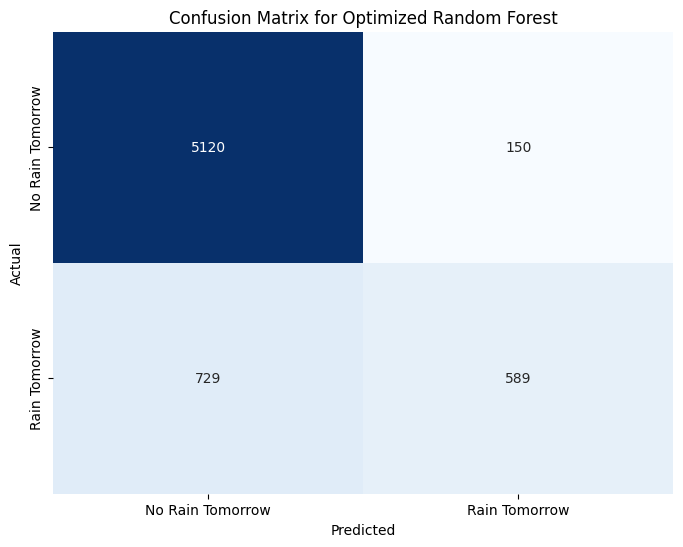


Reporte de Clasificación:
                  precision    recall  f1-score   support

No Rain Tomorrow       0.88      0.97      0.92      5270
   Rain Tomorrow       0.80      0.45      0.57      1318

        accuracy                           0.87      6588
       macro avg       0.84      0.71      0.75      6588
    weighted avg       0.86      0.87      0.85      6588



In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("Mejores parámetros para Random Forest:", grid_search_rf.best_params_)
print("Mejor score (CV) para Random Forest:", grid_search_rf.best_score_)

# Evaluate on test with the best model
best_rf = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)

print("Accuracy en test para Random Forest:", accuracy_score(y_test, y_pred_rf_best))

# Calculate the confusion matrix for the best Random Forest model
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain Tomorrow', 'Rain Tomorrow'],
            yticklabels=['No Rain Tomorrow', 'Rain Tomorrow'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Optimized Random Forest')
plt.show()

# Print the classification report
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf_best, target_names=['No Rain Tomorrow', 'Rain Tomorrow']))

Arbol representativo del modelo de Random Forest

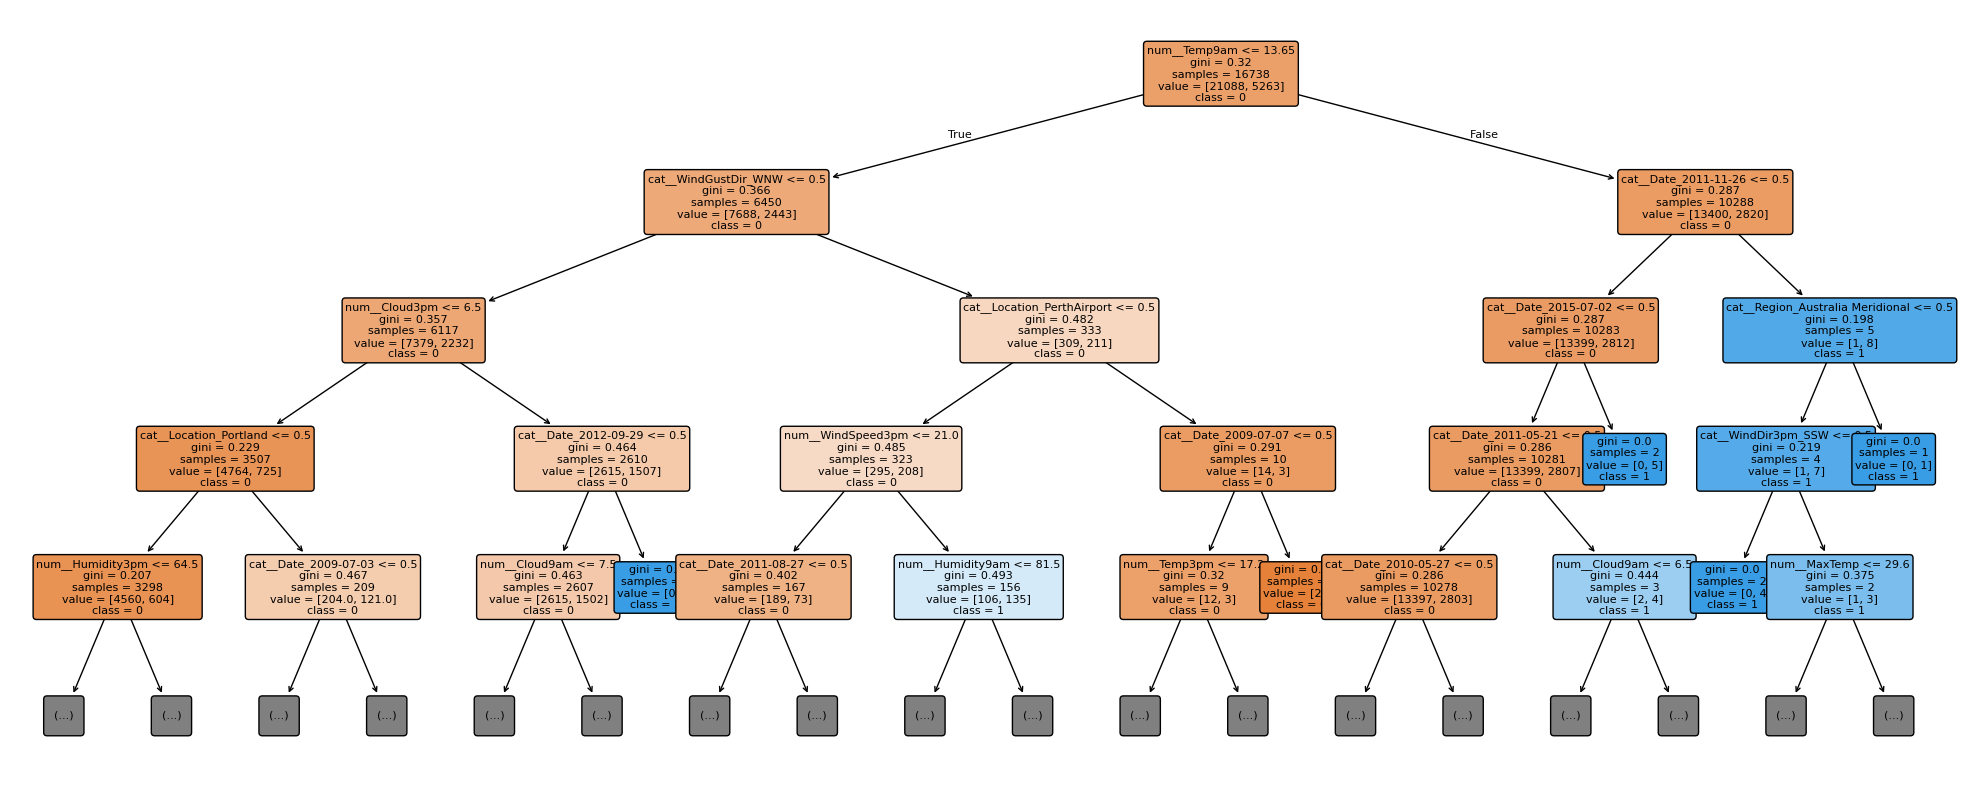

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extraemos el modelo del pipeline
rf_model = rf_pipeline.named_steps["classifier"]

estimator = rf_model.estimators_[0]

plt.figure(figsize=(25, 10))
plot_tree(estimator,
          feature_names=rf_pipeline.named_steps["preprocessor"].get_feature_names_out(),
          class_names=rf_model.classes_.astype(str),
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=4)
plt.show()


In [ ]:
# Reporte clasificacion random forest con optimizacion
report_rf = classification_report(y_test, y_pred_rf_best, target_names=['No Rain Tomorrow', 'Rain Tomorrow'], output_dict=True)
accuracy_rf_best = report_rf['accuracy']
precision_rf_rain = report_rf['Rain Tomorrow']['precision']
recall_rf_rain = report_rf['Rain Tomorrow']['recall']
f1_rf_rain = report_rf['Rain Tomorrow']['f1-score']
precision_rf_no_rain = report_rf['No Rain Tomorrow']['precision']
recall_rf_no_rain = report_rf['No Rain Tomorrow']['recall']
f1_rf_no_rain = report_rf['No Rain Tomorrow']['f1-score']

# Modelo 3: XGBoost

En este bloque se entrena un modelo de **XGBoost**, un algoritmo basado en *gradient boosting* que construye árboles de decisión de forma secuencial optimizando los errores del conjunto previo.  

El flujo seguido es:

1. Definición del pipeline con el preprocesamiento y el clasificador XGBoost.  
2. Validación del modelo mediante **Cross-Validation estratificada** para obtener un estimador más confiable del desempeño.  
3. Entrenamiento final del modelo con todos los datos de entrenamiento.  
4. Predicciones en el conjunto de test.  
5. Evaluación con matriz de confusión y métricas principales.  

## Entrenar Modelo

In [31]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Ruta y URL del modelo
MODEL_PATH = "xgb_pipeline.joblib"
MODEL_URL = "https://drive.google.com/file/d/1bo2EITzJO8hNEzOEAhg8SwdT7IBbFWST/view?usp=sharing"

# Verificar si el modelo existe localmente, si no, intentar descargarlo
if not os.path.exists(MODEL_PATH):
  gdown.download(MODEL_URL, MODEL_PATH, quiet=False, fuzzy=True)

# Si todavía no existe, entrenar uno nuevo
if not os.path.exists(MODEL_PATH) or os.path.getsize(MODEL_PATH) == 0:
  print("Entrenando modelo\n")
  # Pipeline completo con XGBoost
  xgb_pipeline = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("classifier", XGBClassifier(
      n_estimators=200,
      learning_rate=0.1,
      max_depth=6,
      subsample=0.8,
      colsample_bytree=0.8,
      random_state=42,
      eval_metric="logloss"   # este sí es importante mantener
    ))
  ])

  # Cross-validation
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  cv_scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=cv, scoring="accuracy")

  print("Resultados Cross-Validation (accuracy por fold):", cv_scores)
  print("Promedio accuracy CV:", cv_scores.mean())

  # Entrenamiento final
  xgb_pipeline.fit(X_train, y_train)

  dump(xgb_pipeline, "xgb_pipeline.joblib")
else:
  print("Cargando modelo ya entrenado\n")
  xgb_pipeline = load("xgb_pipeline.joblib")

Downloading...
From: https://drive.google.com/uc?id=1bo2EITzJO8hNEzOEAhg8SwdT7IBbFWST
To: /content/xgb_pipeline.joblib
100%|██████████| 636k/636k [00:00<00:00, 76.3MB/s]

Cargando modelo ya entrenado



## Evaluar Modelo

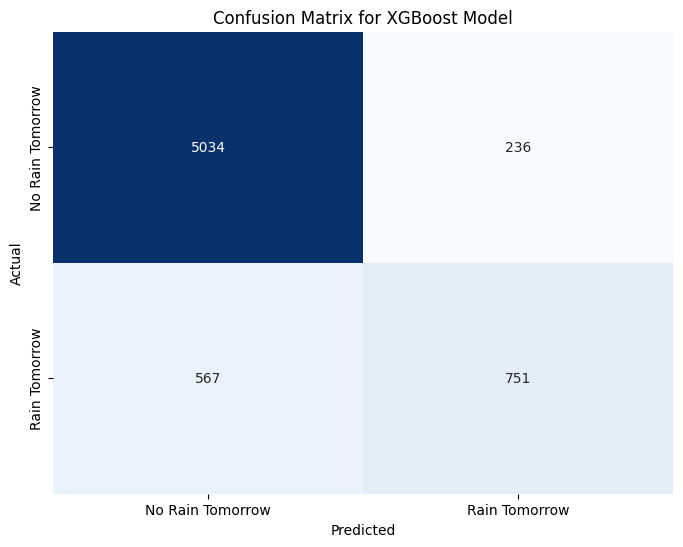


Reporte de Clasificación:
                  precision    recall  f1-score   support

No Rain Tomorrow       0.90      0.96      0.93      5270
   Rain Tomorrow       0.76      0.57      0.65      1318

        accuracy                           0.88      6588
       macro avg       0.83      0.76      0.79      6588
    weighted avg       0.87      0.88      0.87      6588



In [32]:
# Predict using the trained XGBoost model
y_pred_xgb = xgb_pipeline.predict(X_test)

# Calculate the confusion matrix for the XGBoost model
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain Tomorrow', 'Rain Tomorrow'],
            yticklabels=['No Rain Tomorrow', 'Rain Tomorrow'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

# Print the classification report
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Rain Tomorrow', 'Rain Tomorrow']))

## Variables relevantes para XGBoost

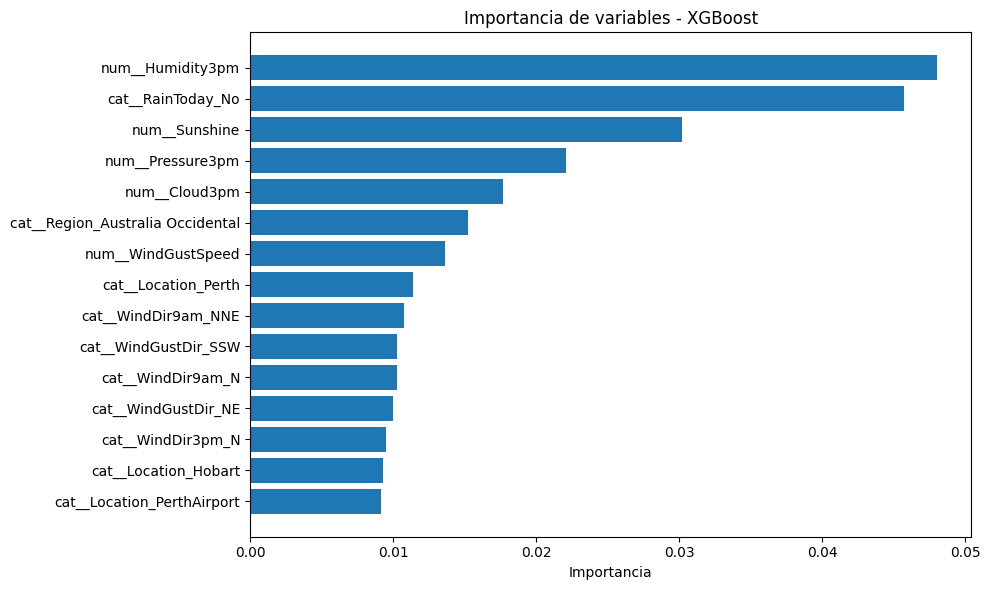

In [ ]:
import matplotlib.pyplot as plt

xgb_model = xgb_pipeline.named_steps["classifier"]

importances = xgb_model.feature_importances_

preprocessor_trained = xgb_pipeline.named_steps["preprocessor"]
all_features = preprocessor_trained.get_feature_names_out()

# Ordenar importancias
sorted_idx = np.argsort(importances)[::-1][:15]  # es eltop 15
plt.figure(figsize=(10,6))
plt.barh(all_features[sorted_idx][::-1], importances[sorted_idx][::-1])
plt.title("Importancia de variables - XGBoost")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

In [ ]:
# Reporte de clasificacion XGBoost con optimiazcion
report_xgb = classification_report(y_test, y_pred_xgb, target_names=['No Rain Tomorrow', 'Rain Tomorrow'], output_dict=True)
accuracy_xgb = report_xgb['accuracy']
precision_xgb_rain = report_xgb['Rain Tomorrow']['precision']
recall_xgb_rain = report_xgb['Rain Tomorrow']['recall']
f1_xgb_rain = report_xgb['Rain Tomorrow']['f1-score']
precision_xgb_no_rain = report_xgb['No Rain Tomorrow']['precision']
recall_xgb_no_rain = report_xgb['No Rain Tomorrow']['recall']
f1_xgb_no_rain = report_xgb['No Rain Tomorrow']['f1-score']

# Comparacion de resultados

(cuadro comparativo con los resultados)

In [ ]:
from IPython.display import display, Markdown

tabla = f"""
| Métrica           | Árbol de Decisión (Optimizado) | Random Forest (Optimizado) | XGBoost             |
|-------------------|--------------------------------|----------------------------|---------------------|
| Accuracy (Test)   | {accuracy_dt_best:.4f}        | {accuracy_rf_best:.4f}    | {accuracy_xgb:.4f} |
| Precision (Rain Tomorrow) | {precision_dt_rain:.4f}   | {precision_rf_rain:.4f}   | {precision_xgb_rain:.4f} |
| Recall (Rain Tomorrow)    | {recall_dt_rain:.4f}      | {recall_rf_rain:.4f}      | {recall_xgb_rain:.4f} |
| F1-Score (Rain Tomorrow) | {f1_dt_rain:.4f}          | {f1_rf_rain:.4f}          | {f1_xgb_rain:.4f} |
| Precision (No Rain Tomorrow) | {precision_dt_no_rain:.4f} | {precision_rf_no_rain:.4f} | {precision_xgb_no_rain:.4f} |
| Recall (No Rain Tomorrow)| {recall_dt_no_rain:.4f}     | {recall_rf_no_rain:.4f}     | {recall_xgb_no_rain:.4f} |
| F1-Score (No Rain Tomorrow)| {f1_dt_no_rain:.4f}       | {f1_rf_no_rain:.4f}        | {f1_xgb_no_rain:.4f} |
"""

display(Markdown(tabla))



| Métrica           | Árbol de Decisión (Optimizado) | Random Forest (Optimizado) | XGBoost             |
|-------------------|--------------------------------|----------------------------|---------------------|
| Accuracy (Test)   | 0.8528        | 0.8666    | 0.8781 |
| Precision (Rain Tomorrow) | 0.6816   | 0.7970   | 0.7609 |
| Recall (Rain Tomorrow)    | 0.4954      | 0.4469      | 0.5698 |
| F1-Score (Rain Tomorrow) | 0.5738          | 0.5727          | 0.6516 |
| Precision (No Rain Tomorrow) | 0.8819 | 0.8754 | 0.8988 |
| Recall (No Rain Tomorrow)| 0.9421     | 0.9715     | 0.9552 |
| F1-Score (No Rain Tomorrow)| 0.9110       | 0.9209        | 0.9261 |


**Análisis de los Resultados:**

Los tres modelos presentan un rendimiento alto, aunque con diferencias notables según la métrica considerada.

*XGBoost* obtiene la mayor **Accuracy (0.8781)**, lo que indica que es el modelo más preciso en el conjunto de prueba. Para la variable objetivo “Rain Tomorrow” el modelo *Random Forest* logra la mayor **precisión (0.7970)**, lo que significa que sus predicciones positivas son más confiables, aunque su **recall (0.4469)** es bajo, indicando que deja escapar varios casos de lluvia real. En contraste, *XGBoost* mejora el **recall (0.5698)**, capturando más lluvias efectivas, y obtiene el mejor **F1-Score (0.6516)** , lo que refleja un equilibrio más adecuado entre precisión y sensibilidad. El *Árbol de Decisión*, en cambio, muestra el peor desempeño en esta categoría, especialmente en **recall (0.4954)**.

Las diferencias entre modelos son menores, aunque *XGBoost* también se impone ligeramente, con **precisión (0.8988)**, **recall (0.9552)** y **F1-score (0.9261)** superiores. Esto demuestra que mantiene un bajo nivel de falsos positivos.

En síntesis, el *Árbol de Decisión* es el más simple pero menos eficaz, *Random Forest* mejora la estabilidad y precisión, y *XGBoost* ofrece el mejor balance global entre todas las métricas. Por lo tanto, *XGBoost* se destaca como el modelo más robusto y equilibrado para esta tarea de predicción.